## Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Specialization - Machine Learning\Achievement 1\Data Sets'

In [5]:
# Importing Climate Wins Original Dataset
climate =  pd.read_csv(os.path.join(path, 'Climate_Wins_Original.csv'))

In [8]:
# Inspecting
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [6]:
# Importing Pleasant Weather Dataset
pw =  pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [10]:
# Inspecting
pw.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Reducing "climate" dataset to temparature variables - NOT including Gdansk, Rome and Tours
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [12]:
# Creating a 'X' Matrix / Dropping not needed columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pw.drop(['DATE'], axis=1)

In [14]:
# Splitting data into Training and Testing Mode
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Running model with neighbors equal to 1 to 4 and testing accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) 
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) 
    test_acc[i] = knn.score(X_test, np.array(y_test)) 

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

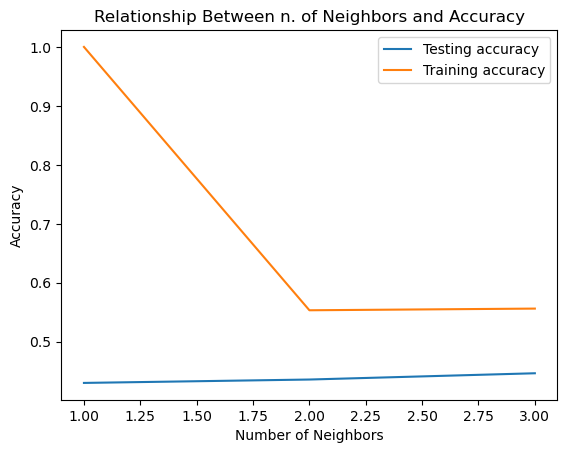

In [17]:
# Visualizing the relatioship between n. of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Testing accuracy')
plt.plot(k_range, train_acc, label = 'Training accuracy')
plt.legend()
plt.title("Relationship Between n. of Neighbors and Accuracy")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

C:\Users\ophab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


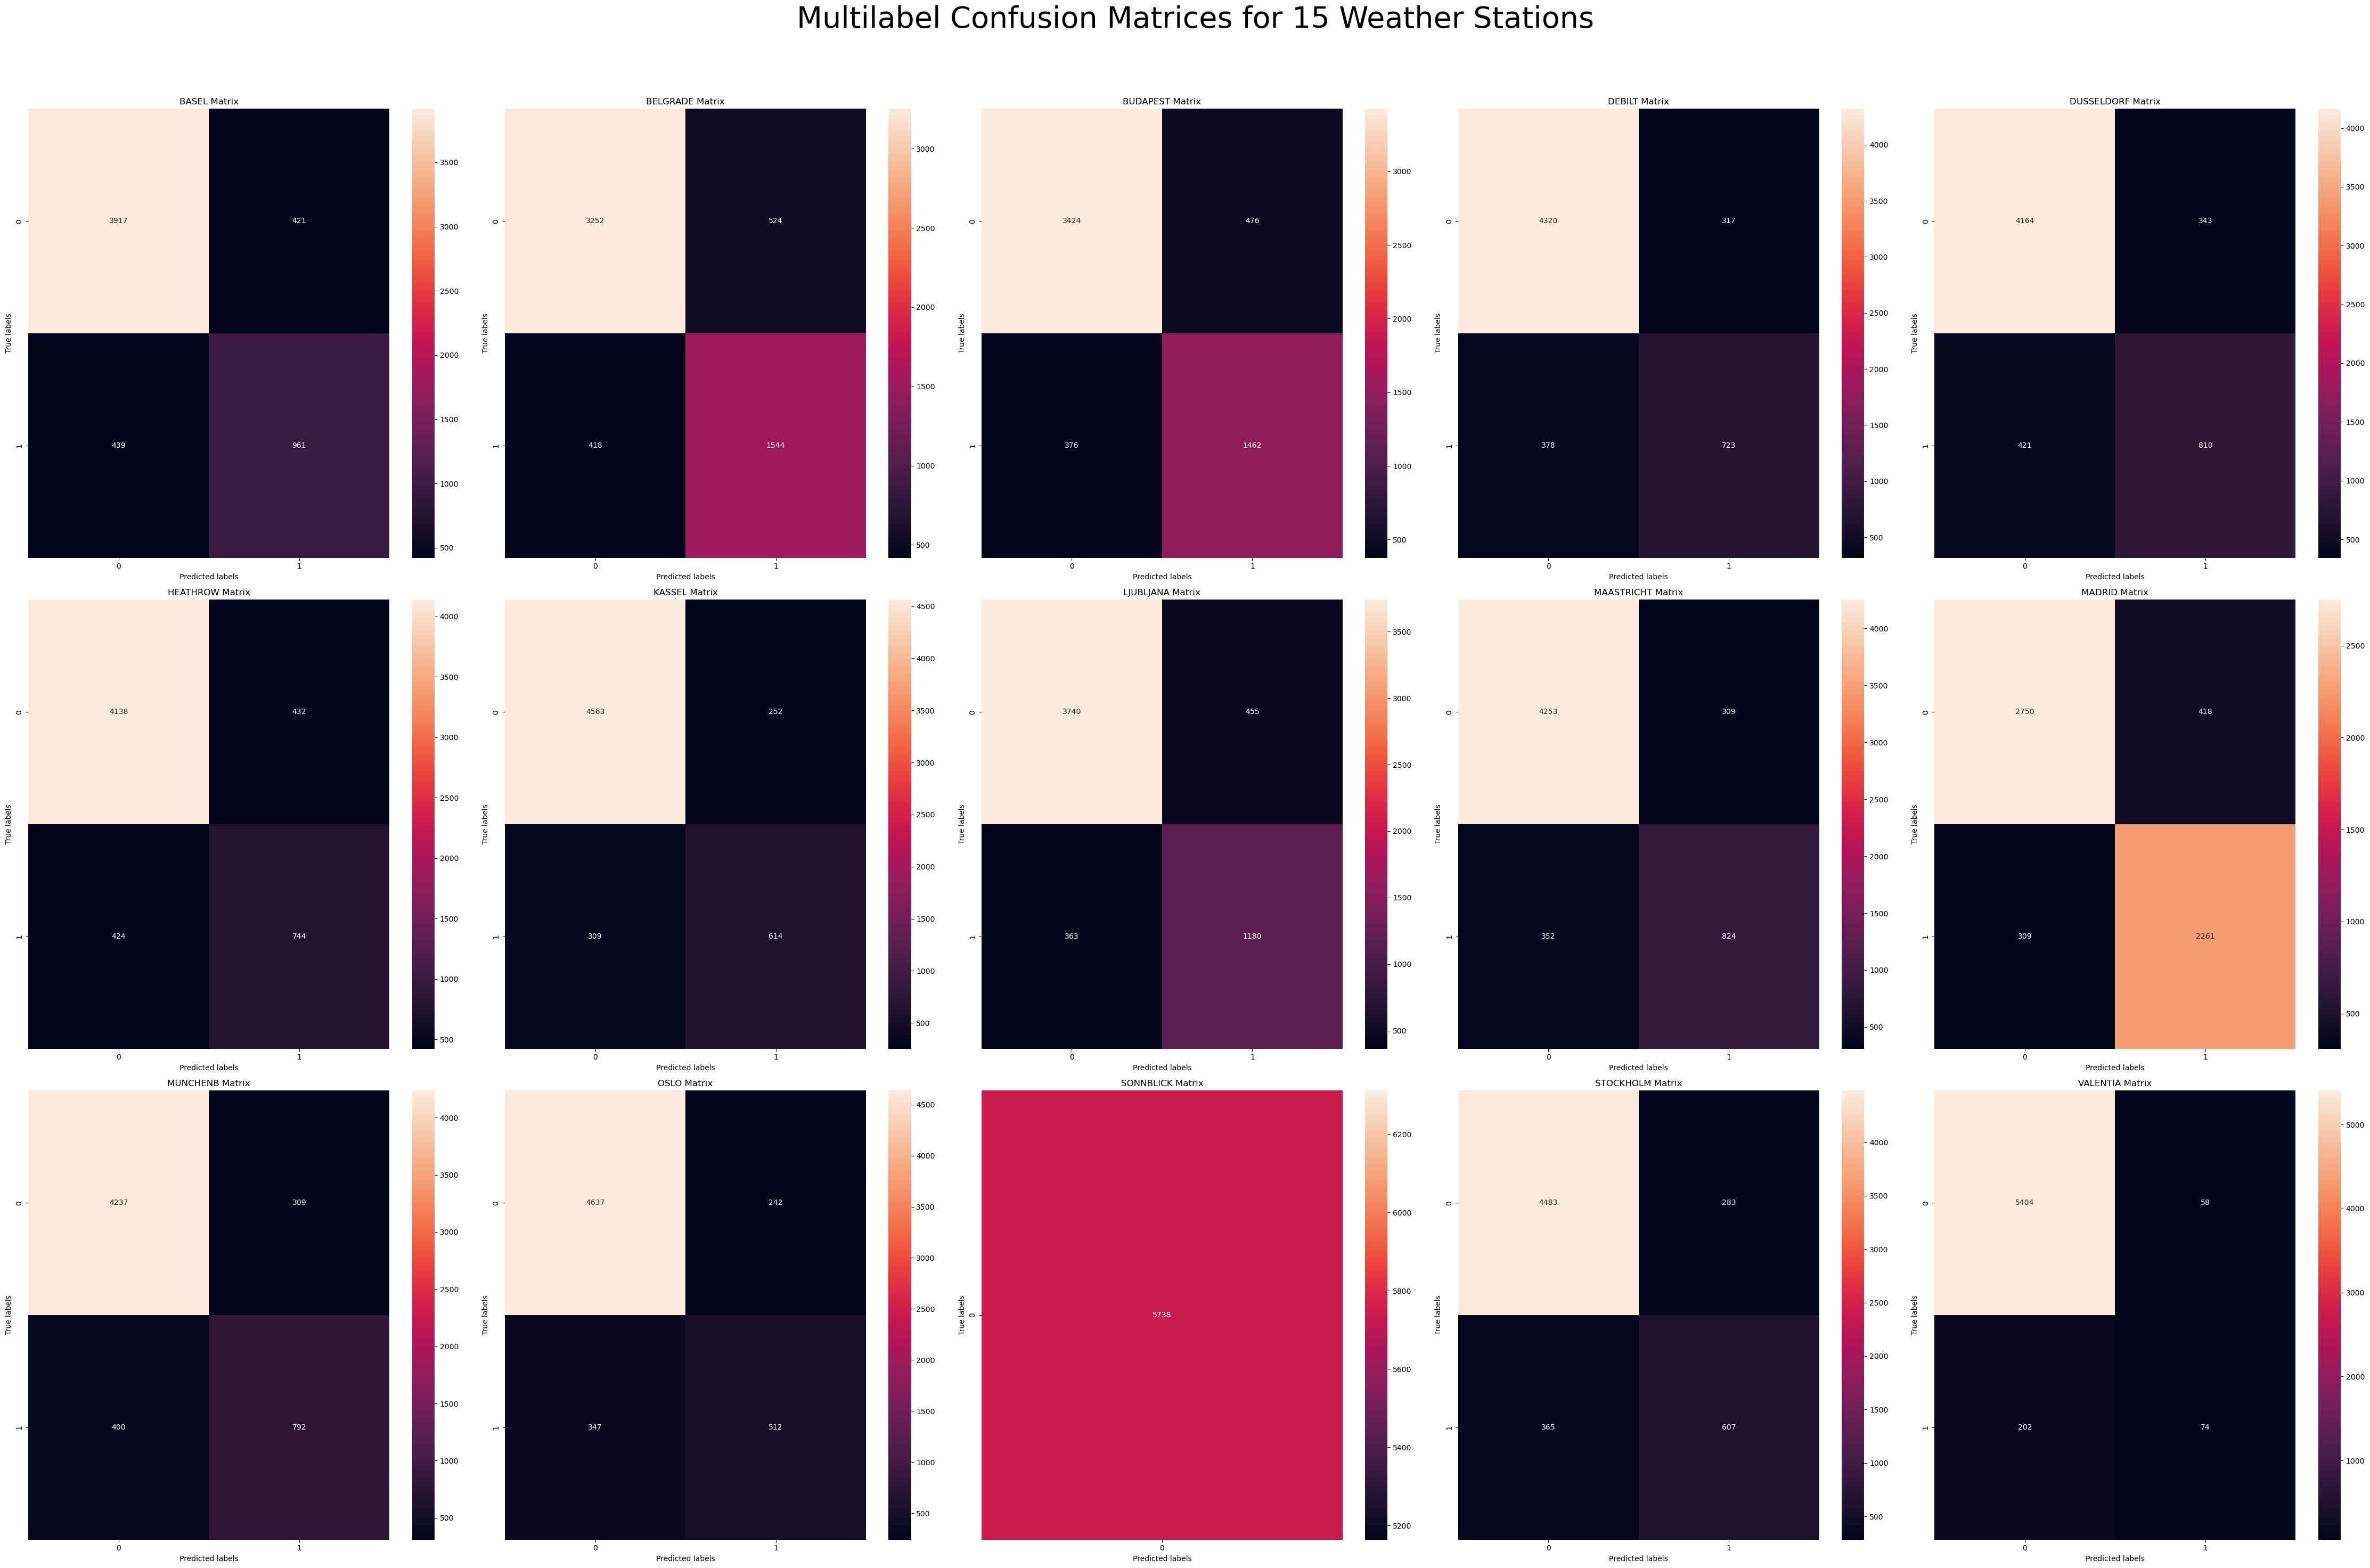

In [36]:
# Plotting multilabel confusion matrix 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(45,30))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

# Adding a main title for the entire figure
figure.suptitle('Multilabel Confusion Matrices for 15 Weather Stations', fontsize=40)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

### Create table of accurate predictions, false positives/negatives, and accuracy rate

In [32]:
# Only keeping unique stations
stations = sorted({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})

In [31]:
key = "_pleasant_weather"
stations = sorted([col.split("_")[0] for col in y_test.columns])  # 15 stations

metrics_list = []

for count, name in enumerate(stations):
    # Compute confusion matrix
    cm = confusion_matrix(y_test[name+key], y_pred[:, count], labels=[1,0])
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[1,0]
    FN = cm[0,1]

    # Store in the "colleague format"
    metrics_list.append({
        'Weather Station': name,
        'Accurate Predictions': f"{TP} - {TN}",
        'False Positive': FP,
        'False Negative': FN,
        'Accuracy Rate': round((TP+TN)/cm.sum(), 2)
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)
metrics_df

,Weather Station,Accurate Predictions,False Positive,False Negative,Accuracy Rate
0,BASEL,961 - 3917,421,439,0.85
1,BELGRADE,1544 - 3252,524,418,0.84
2,BUDAPEST,1462 - 3424,476,376,0.85
3,DEBILT,723 - 4320,317,378,0.88
4,DUSSELDORF,810 - 4164,343,421,0.87
5,HEATHROW,744 - 4138,432,424,0.85
6,KASSEL,614 - 4563,252,309,0.90
7,LJUBLJANA,1180 - 3740,455,363,0.86
8,MAASTRICHT,824 - 4253,309,352,0.88
9,MADRID,2261 - 2750,418,309,0.87
